In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:

#complete table
df_all = pd.read_csv('/home/collot/stage/collot/collot/out_ortho/all_species_df.tsv', sep='\t')

#create a gene column
df_all['gene']=df_all['gene'].apply(lambda x: x.split('_')[-2])
total_genes_per_species = df_all.groupby('species')['gene'].nunique()
df_all['total_number_genes']= df_all['species'].map(total_genes_per_species)

#associate taxonomy id with species anmes
df_table= pd.read_csv('/home/collot/stage/collot/PrimateData/PrimateInfo.csv', sep='\t')
genid_species = dict(zip(df_table['Organism Taxonomic ID'].astype(str), df_table['Organism Name'].astype(str)))  #dictionary containing tuples (genome_id/specie_name)

#turn table into explicit table
event_columns = ['fission', 'fusion', 'full_duplication', 'others'] 
df_all[event_columns] = df_all[event_columns].fillna(0) 
df_long = df_all.melt(id_vars=['gene', 'species', 'nb_exons'], value_vars=event_columns, var_name='event_type', value_name='event_count')
df_long['species'] = df_long['species'].astype(str).map(genid_species)

#order the species in the graph
species_order = df_long.groupby('species')['event_count'].sum().sort_values(ascending=False).index
df_long['species'] = pd.Categorical(df_long['species'], categories=species_order, ordered=True)


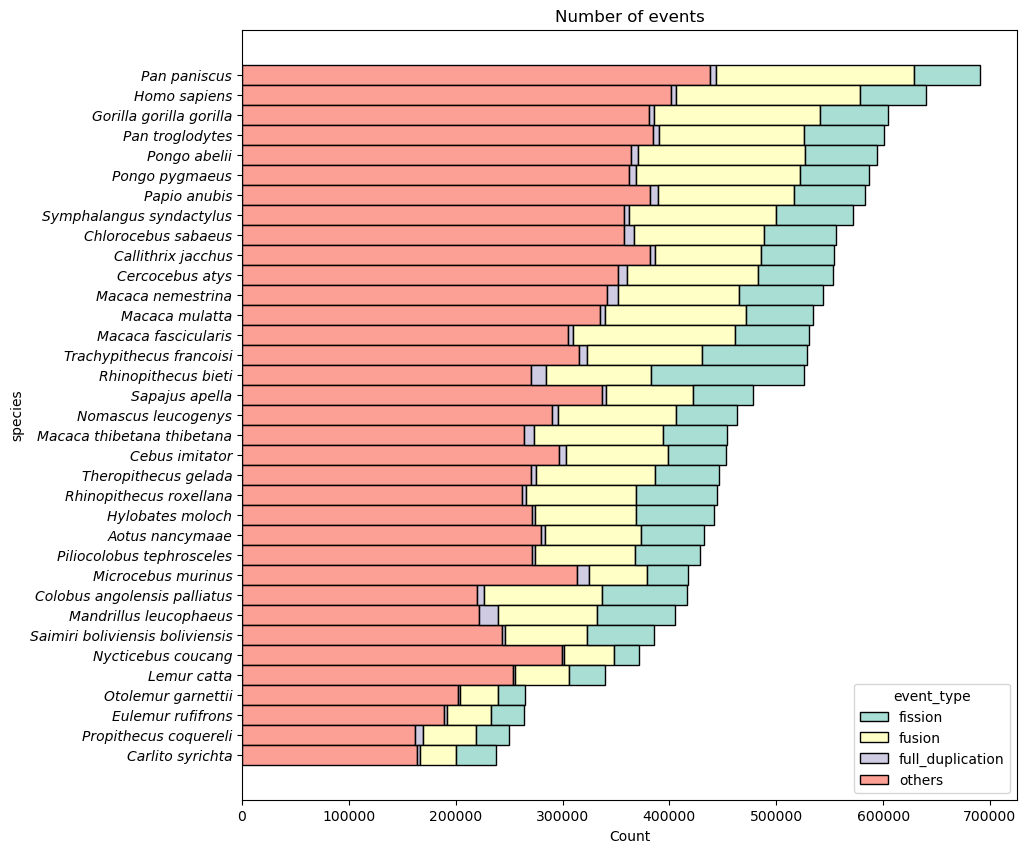

In [5]:

# Plot the histogram
fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data=df_long, y="species", hue="event_type", weights="event_count", bins=35, multiple="stack", palette="Set3")
plt.title('Number of events')
for label in ax.get_yticklabels():
    label.set_fontstyle('italic')
plt.tight_layout
plt.savefig('/home/collot/stage_git/figures/all_events.png', bbox_inches='tight')

In [6]:
#mean no event 

df_all['proportion_no_events']= (df_all['no_event']/df_all['nb_hits'])*100
mean_percentage=df_all['proportion_no_events'].mean()
print(mean_percentage)


84.5652580588308


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

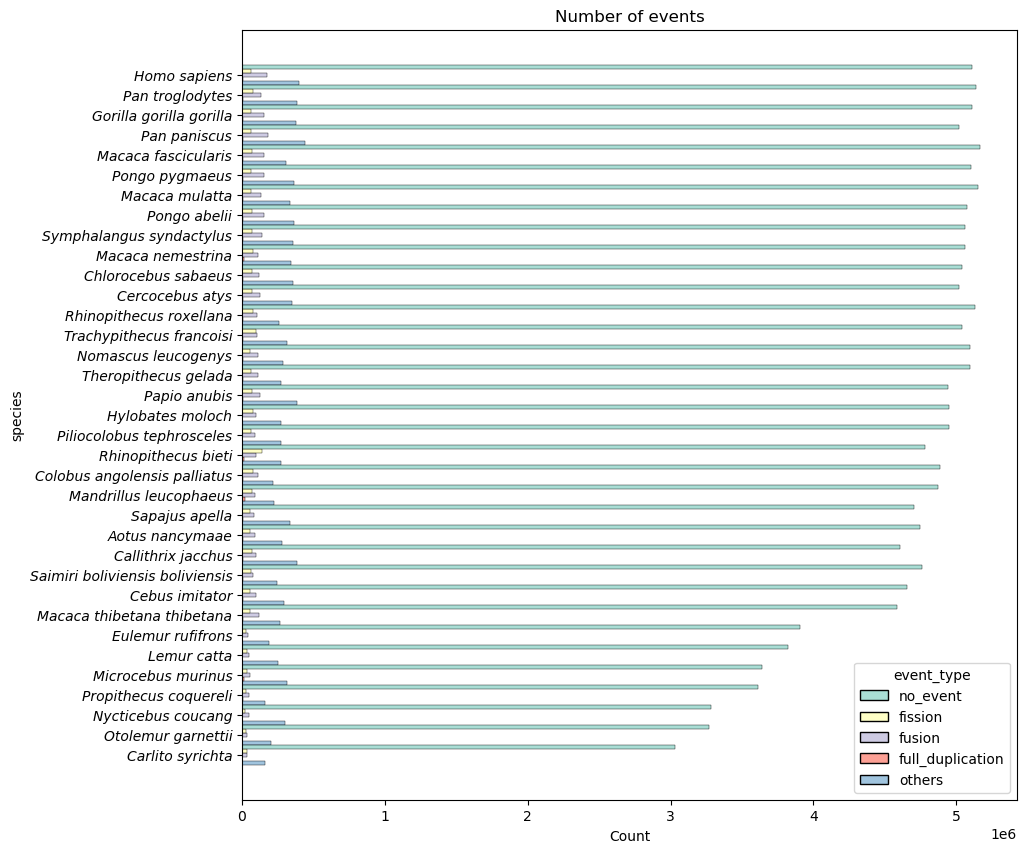

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#complete table
df_all = pd.read_csv('/home/collot/stage/collot/collot/out_ortho/all_species_df.tsv', sep='\t')

#create a gene column
df_all['gene']=df_all['gene'].apply(lambda x: x.split('_')[-2])
total_genes_per_species = df_all.groupby('species')['gene'].nunique()
df_all['total_number_genes']= df_all['species'].map(total_genes_per_species)

#associate taxonomy id with species anmes
df_table= pd.read_csv('/home/collot/stage/collot/PrimateData/PrimateInfo.csv', sep='\t')
genid_species = dict(zip(df_table['Organism Taxonomic ID'].astype(str), df_table['Organism Name'].astype(str)))  #dictionary containing tuples (genome_id/specie_name)

#turn table into explicit table
event_columns = ['no_event','fission', 'fusion', 'full_duplication', 'others'] 
df_all[event_columns] = df_all[event_columns].fillna(0) 
df_long = df_all.melt(id_vars=['gene', 'species', 'nb_exons'], value_vars=event_columns, var_name='event_type', value_name='event_count')
df_long['species'] = df_long['species'].astype(str).map(genid_species)

#order the species in the graph
species_order = df_long.groupby('species')['event_count'].sum().sort_values(ascending=False).index
df_long['species'] = pd.Categorical(df_long['species'], categories=species_order, ordered=True)

# Plot the histogram
fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data=df_long, y="species", hue="event_type", weights="event_count", bins=35, multiple="dodge", palette="Set3")
plt.title('Number of events')
for label in ax.get_yticklabels():
    label.set_fontstyle('italic')
plt.tight_layout
#plt.savefig('/home/collot/stage_git/figures/all_events_no_event.png', bbox_inches='tight')

species
9447       339978
9470       371284
9483       554270
9515       477953
9531       552885
9541       531076
9544       534238
9545       543624
9555       583370
9565       446820
9568       404807
9590       572129
9595       604239
9597       690772
9598       600445
9600       586773
9601       593966
9606       640489
30608      417402
30611      264640
37293      432099
39432      385117
54180      528976
60711      555916
61621      525698
61622      444259
61853      463679
81572      442033
257877     453719
336983     416173
379532     249514
591936     428658
859984     264245
1868482    237419
2715852    453001
Name: total_events, dtype: int64
        gene  species  nb_exons  nb_hits  no_event  fusion  fission  \
0       A1CF  1868482        10      301       300       0        0   
15420   A1CF   257877        12      394       353       2        0   
30439   A1BG  2715852         7      161       154       0        6   
47407   A1BG    30608         6       77     

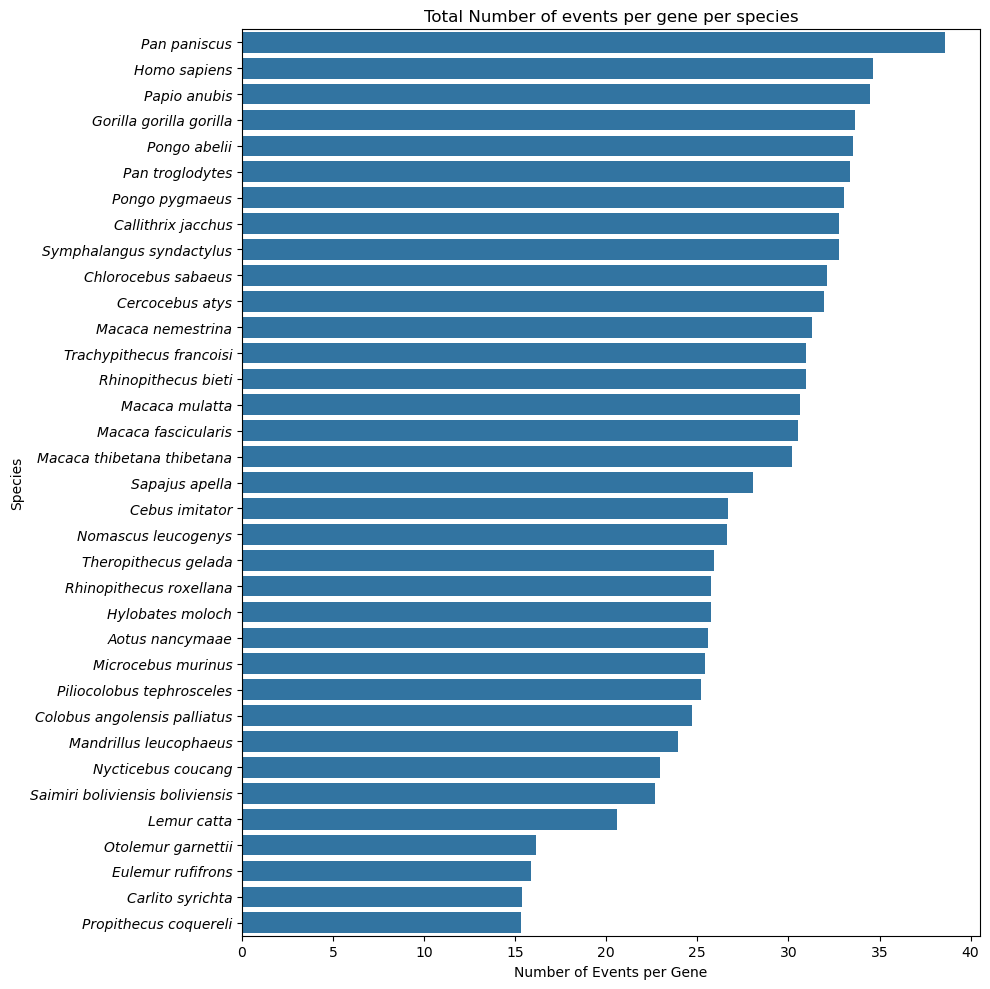

In [8]:
df_all = pd.read_csv('/home/collot/stage/collot/collot/out_ortho/all_species_df.tsv', sep='\t')
#create a gene column
event_columns = ['fission', 'fusion', 'full_duplication', 'others'] 
df_all[event_columns] = df_all[event_columns].fillna(0) 
df_all['gene']=df_all['gene'].apply(lambda x: x.split('_')[-2])
total_genes_per_species = df_all.groupby('species')['gene'].nunique()
df_all['total_number_genes']= df_all['species'].map(total_genes_per_species)
df_all['total_events'] = df_all[event_columns].sum(axis=1)
total_events_per_species = df_all.groupby('species')['total_events'].sum()
print(total_events_per_species)

# Calculate the ratio of total events to total genes
df_all['species_name'] = df_all['species'].astype(str).map(genid_species)
df_all = df_all.drop_duplicates(subset=['species']) 
df_all['events_per_gene'] = df_all['species'].map(total_events_per_species).div(df_all['total_number_genes'], axis=0)

print(df_all)
# Order species by the ratio
df_all = df_all.sort_values(by='events_per_gene', ascending=False)

# Plot the histogram
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=df_all, y="species_name", x="events_per_gene")
plt.title('Total Number of events per gene per species')
plt.xlabel('Number of Events per Gene')
plt.ylabel('Species')
for label in ax.get_yticklabels():
    label.set_fontstyle('italic')

plt.tight_layout()
plt.savefig('/home/collot/stage_git/figures/total_events_per_gene.png', bbox_inches='tight')
plt.show()

In [2]:
#heatmap
df_all = pd.read_csv('/home/collot/stage/collot/collot/out_ortho/all_species_df.tsv', sep='\t')
df_table= pd.read_csv('/home/collot/stage/collot/PrimateData/PrimateInfo.csv', sep='\t')
genid_species = dict(zip(df_table['Organism Taxonomic ID'].astype(str), df_table['Organism Name'].astype(str)))  #dictionary containing tuples (genome_id/specie_name)


event_columns = ['fission', 'fusion', 'full_duplication', 'others']  
df_all['species_name'] = df_all['species'].astype(str).map(genid_species)
